<a href="https://colab.research.google.com/github/anuradha-datascience/deep-learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting if a person would buy life insurnace based on his age using logistic regression![neuralnetwork.PNG](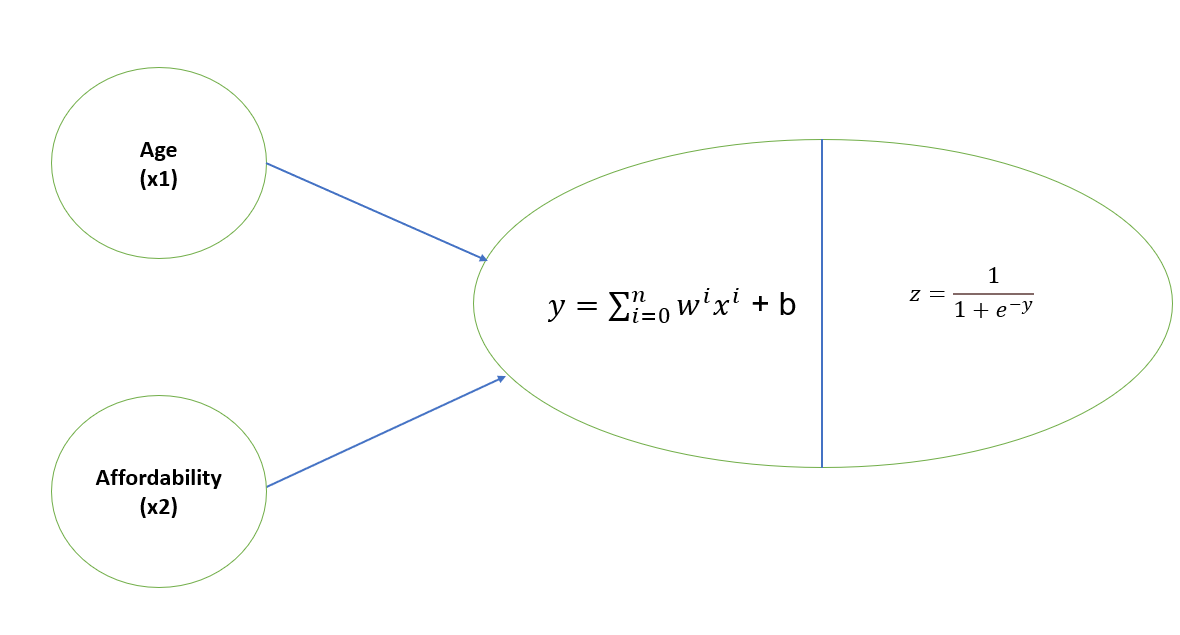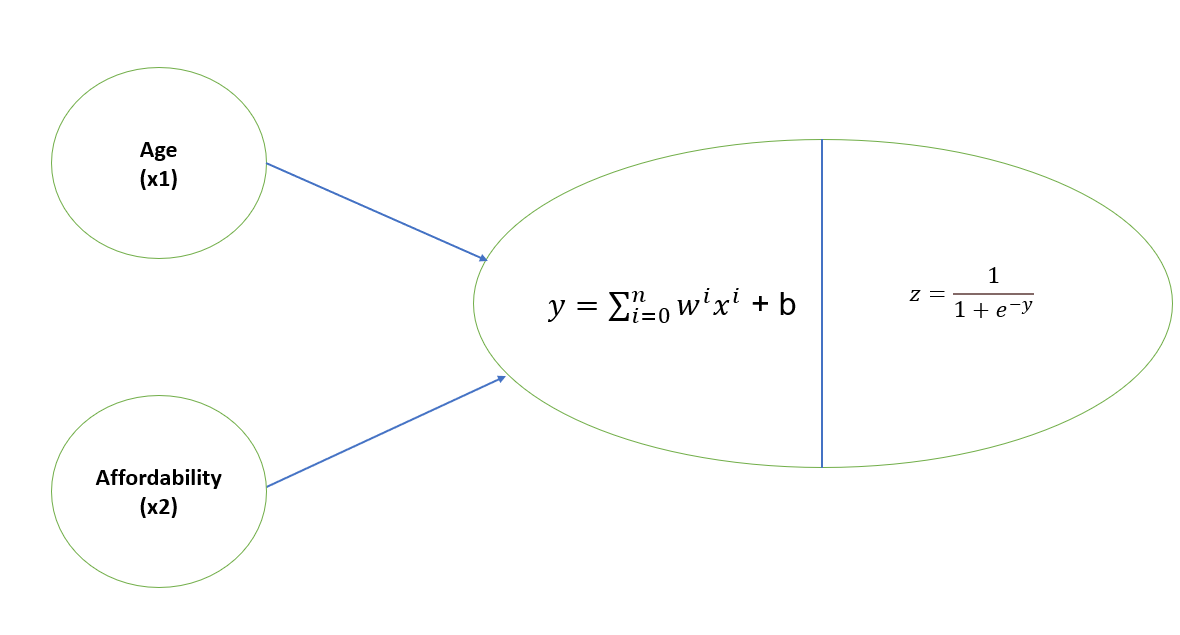)**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as pyplot
%matplotlib inline

In [6]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [7]:
# split train and test set
from sklearn.model_selection import train_test_split
X=df[["age","affordibility"]]
y=df["bought_insurance"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

Preprocess Data: Scale Age and Affordibility to bring in same range

In [8]:
X_train_scaled=X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100
X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100


Model Building:

1) using Keras and tensorflow

2) using python

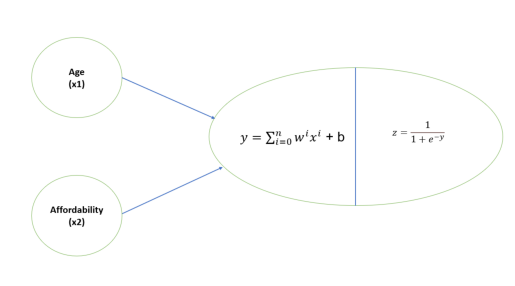

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('neuralnetwork.PNG') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

Using Keras and tensorflow

In [13]:
model=keras.Sequential([
   keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros'),

])
model.compile(optimizer="adam",loss="binary_crossentropy",
                 metrics=["accuracy"])
model.fit(X_train_scaled,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.5251 - accuracy: 0.7727
Epoch 2502/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5250 - accuracy: 0.7727
Epoch 2503/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5250 - accuracy: 0.7727
Epoch 2504/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 2505/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 2506/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 2507/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5248 - accuracy: 0.7727
Epoch 2508/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5248 - accuracy: 0.7727
Epoch 2509/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5248 - accuracy: 0.7727
Epoch 2510/5000
1/1 [==========================

In [15]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 466ms/step - loss: 0.3365 - accuracy: 0.8333


[0.33646634221076965, 0.8333333134651184]

In [16]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 117ms/step


array([[0.85744447],
       [0.4361822 ],
       [0.17532319],
       [0.18326381],
       [0.82118106],
       [0.5032958 ]], dtype=float32)

In [17]:
y_test

9     1
26    0
21    0
12    0
5     1
11    0
Name: bought_insurance, dtype: int64

In [18]:
#get weights and bias
coef,intercept=model.get_weights()

In [19]:
coef,intercept

(array([[5.3970947],
        [1.453602 ]], dtype=float32),
 array([-2.951605], dtype=float32))

w1=5.3970947,w2=1.453602,bias=-2.951605

**Implement using Python**




In [20]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))

sigmoid(18)

0.9999999847700205

In [21]:
X_test

,age,affordibility
9,61,1
26,23,1
21,26,0
12,27,0
5,56,1
11,28,1


**Write own prediction function that uses w1,w2 and bias**

In [22]:
def prediction_function(age, affordibility):
  weighted_sum=coef[0]*age+coef[1]*affordibility+intercept
  return sigmoid(weighted_sum)

prediction_function(.61,1)

<ipython-input-20-92336c902888>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.857444432076148

In [23]:
prediction_function(.26,0)

<ipython-input-20-92336c902888>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.17532319382942668

**Implement Gradient Descent for neural network using python- to come up with best w1, w2 and bias**

In [25]:
np.exp([-3,2])

array([0.04978707, 7.3890561 ])

In [29]:
def sigmoid_numpy(X):
  return 1/(1+np.exp(-X))
sigmoid_numpy(np.array([12,0,1]))


array([0.99999386, 0.5       , 0.73105858])

In [30]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

# Implement own neural network

In [40]:
class myNN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.bias=0

  def fit(self,X,y,epochs,loss_threshold):
      self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_threshold)
      print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

  def predict(self,X_test):
    weighted_sum=self.w1*X_test['age']+self.w2*X_test['affordibility']
    return sigmoid_numpy(weighted_sum)

  def gradient_descent(self, age,affordability, y_true, epochs, loss_threshold):
          w1 = w2 = 1
          bias = 0
          rate = 0.5
          n = len(age)
          for i in range(epochs):
              weighted_sum = w1 * age + w2 * affordability + bias
              y_predicted = sigmoid_numpy(weighted_sum)
              loss = log_loss(y_true, y_predicted)

              w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
              w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

              bias_d = np.mean(y_predicted-y_true)
              w1 = w1 - rate * w1d
              w2 = w2 - rate * w2d
              bias = bias - rate * bias_d

              if i%50==0:
                  print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

              if loss<=loss_threshold:
                  print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                  break

          return w1, w2, bias


In [47]:
customModel=myNN()
customModel.fit(X_train_scaled,y_train,epochs=8000,loss_threshold=0.4631)

Epoch:0, w1:0.9811382085705194, w2:0.9530319541416706, bias:-0.09584637350369292, loss:0.6815113912638325
Epoch:50, w1:1.5337178226178552, w2:1.073436268176503, bias:-1.0840909399955778, loss:0.5711719117317315
Epoch:100, w1:2.219961053545915, w2:1.245510280417592, bias:-1.5002952273303187, loss:0.5439677101310887
Epoch:150, w1:2.8578172201703476, w2:1.3258782710785617, bias:-1.824648789428554, loss:0.523120269972737
Epoch:200, w1:3.441317198091311, w2:1.370090054305509, bias:-2.0978837443924823, loss:0.5063677435337791
Epoch:250, w1:3.9719945400987906, w2:1.4001777096721915, bias:-2.3380529326237327, loss:0.4927072500029064
Epoch:300, w1:4.454065637141395, w2:1.424928113929811, bias:-2.5539586075223335, loss:0.48148131810478395
Epoch:350, w1:4.892433560455137, w2:1.4477547578516934, bias:-2.7504189716194487, loss:0.4721972396676451
Epoch:400, w1:5.291876407205304, w2:1.4698849102691178, bias:-2.9304361743524, loss:0.4644730169362923
Epoch:410, w1:5.367485981094983, w2:1.47426642732902

In [42]:
coef,intercept

(array([[5.3970947],
        [1.453602 ]], dtype=float32),
 array([-2.951605], dtype=float32))

In [43]:
X_test_scaled

,age,affordibility
9,0.61,1
26,0.23,1
21,0.26,0
12,0.27,0
5,0.56,1
11,0.28,1


In [46]:
customModel.predict(X_test_scaled)

9     0.991409
26    0.937543
21    0.801476
12    0.809879
5     0.988794
11    0.951532
dtype: float64

In [45]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 47ms/step


array([[0.85744447],
       [0.4361822 ],
       [0.17532319],
       [0.18326381],
       [0.82118106],
       [0.5032958 ]], dtype=float32)